# Coffee Shop Sales Analysis

**5 key objectives** :

1. **Identify Top-selling Products by Revenue and Quantity**:
   - Objective: Determine which products and categories (e.g., Coffee, Tea) generate the highest revenue and total sales volume across all stores.

2. **Analyze Store Performance**:
   - Objective: Compare sales performance across store locations to identify high and low-performing stores. Investigate factors driving success in top-performing locations.

3. **Perform BCG Analysis for Product Types**:
   - Objective: Classify products into **Stars, Cash Cows, Dogs, and Question Marks** based on their market growth and sales share to guide strategic decision-making on product focus.

4. **Identify Peak Sales Times and Days**:
   - Objective: Analyze sales patterns by day of the week and time of day to understand when stores experience the highest traffic. This can help optimize staffing and inventory levels.

5. **Explore the Impact of Product Size on Sales**:
   - Objective: Evaluate whether product size (e.g., small, regular, large) influences sales performance. Investigate if larger sizes drive more revenue or if customers prefer smaller sizes for certain product types.

## Import Library and Data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# df = pd.read_excel('C:/Users/user/OneDrive/Documents/GitHub/Data-Analysis-Portfolio/coffee-shop-sales/Coffee Shop Sales.xlsx')
df = pd.read_excel('C:/Users/Eugene/Documents/GitHub/Data-Analysis-Portfolio/coffee-shop-sales/Coffee Shop Sales.xlsx')

In [4]:
df.sample(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
33180,33237,2023-02-28,07:35:26,2,5,Lower Manhattan,42,2.50,Tea,Brewed herbal tea,Lemon Grass Rg
22540,22597,2023-02-10,09:04:29,1,8,Hell's Kitchen,61,4.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg
90041,90295,2023-05-10,08:28:32,2,3,Astoria,55,4.00,Tea,Brewed Chai tea,Morning Sunrise Chai Lg
57293,57404,2023-04-03,19:03:50,1,8,Hell's Kitchen,87,3.00,Coffee,Barista Espresso,Ouro Brasileiro shot
134414,134751,2023-06-18,10:11:36,1,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
139589,139926,2023-06-22,14:54:40,2,8,Hell's Kitchen,61,4.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg
57524,57635,2023-04-04,11:24:08,1,3,Astoria,40,3.75,Coffee,Barista Espresso,Cappuccino
116296,116558,2023-06-03,11:17:10,1,5,Lower Manhattan,74,3.50,Bakery,Biscotti,Ginger Biscotti
117947,118209,2023-06-04,15:50:29,2,3,Astoria,51,3.00,Tea,Brewed Black tea,Earl Grey Lg
57231,57342,2023-04-03,18:08:01,1,3,Astoria,56,2.55,Tea,Brewed Chai tea,Spicy Eye Opener Chai Rg


## Initial Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [6]:
df.shape

(149116, 11)

In [7]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [8]:
df.duplicated().any()

False

In [9]:
df.nunique().reset_index()

,index,0
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


In [10]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [11]:
df.describe(include= object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


## Preprocessing

### Handle Data Type

In [12]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time

### Enhance Data Quality

Extract the size and name from the column `product_detail`.

In [13]:
# Define a function to extract the product size and product name
def extract_product_info(product_detail):
    # Define patterns for size and format
    size_pattern = r'(Rg|Lg|Sm|shot|syrup)$'
    
    # Match size
    size_match = re.search(size_pattern, product_detail)
    
    if size_match:
        # Map size abbreviations to full names
        size_map = {'Rg': 'regular', 'Lg': 'large', 'Sm': 'small', 'shot': 'shot', 'syrup': 'syrup'}
        product_size = size_map.get(size_match.group(), 'unknown')
        
        # Remove size from product name
        product_name = re.sub(size_pattern, '', product_detail).strip()
    else:
        # If no size is found, set size as 'unknown' and product name as original detail
        product_size = 'unknown'
        product_name = product_detail.strip()

    return product_size, product_name

In [14]:
df[['product_size', 'product_name']] = df['product_detail'].apply(lambda x: pd.Series(extract_product_info(x)))

Generate new column name `revenue`, where it contain the calculation value from transaction quantity `transaction_qty` multiply with unit price `unit_price`.

In [15]:
df['revenue'] = df['transaction_qty'] * df['unit_price']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  product_size      149116 non-null  object        
 12  product_name      149116 non-null  object        
 13  revenue           149116 non-null  float64       
dtypes: d

## Analysis

### Identify Top-Selling Products Category by Revenue and Quantity

Determine which products and categories (e.g., Coffee, Tea) generate the highest revenue and total sales volume across all stores.

In [17]:
# Group by product type and product name to calculate total quantity and revenue
product_sales  = df.groupby(['product_type', 'product_category']).agg({
    'transaction_qty': 'sum',
    'revenue': 'sum'
}).reset_index()

In [18]:
top_products_by_revenue  = product_sales.sort_values(by='revenue', ascending=False)
top_products_by_revenue 

,product_type,product_category,transaction_qty,revenue
0,Barista Espresso,Coffee,24943,91406.20
4,Brewed Chai tea,Tea,26250,77081.95
17,Hot chocolate,Drinking Chocolate,17457,72416.00
13,Gourmet brewed coffee,Coffee,25973,70034.60
3,Brewed Black tea,Tea,17462,47932.00
6,Brewed herbal tea,Tea,17328,47539.50
25,Premium brewed coffee,Coffee,12431,38781.15
22,Organic brewed coffee,Coffee,13012,37746.50
27,Scone,Bakery,10465,36866.12
10,Drip coffee,Coffee,12891,31984.00


In [19]:
top_products_by_quantity  = product_sales.sort_values(by='transaction_qty', ascending=False)
top_products_by_quantity 

,product_type,product_category,transaction_qty,revenue
4,Brewed Chai tea,Tea,26250,77081.95
13,Gourmet brewed coffee,Coffee,25973,70034.60
0,Barista Espresso,Coffee,24943,91406.20
3,Brewed Black tea,Tea,17462,47932.00
17,Hot chocolate,Drinking Chocolate,17457,72416.00
6,Brewed herbal tea,Tea,17328,47539.50
22,Organic brewed coffee,Coffee,13012,37746.50
10,Drip coffee,Coffee,12891,31984.00
25,Premium brewed coffee,Coffee,12431,38781.15
27,Scone,Bakery,10465,36866.12


### Analyze Store Performance

Compare sales performance across store locations to identify high and low-performing stores. Investigate factors driving success in top-performing locations.

In [20]:
df['transaction_month'] = df['transaction_date'].dt.month

In [21]:
df['transaction_month'].value_counts()

transaction_month
6    35352
5    33527
4    25335
3    21229
1    17314
2    16359
Name: count, dtype: int64

In [22]:
df['transaction_month'] = df['transaction_date'].dt.month

# Calculate total quantity sold per store per month
monthly_transaction_qty = df.groupby(['store_location', 'transaction_month'])['transaction_qty'].sum().reset_index()

# Rename the total_quantity column
monthly_transaction_qty.rename(columns={'transaction_qty': 'total_quantity'}, inplace=True)

# Pivot the data so each month is a separate column
monthly_transaction_qty_pivot = monthly_transaction_qty.pivot(index='store_location', columns='transaction_month', values='total_quantity')

# Rename columns for clarity
monthly_transaction_qty_pivot.columns = [f'Month_{int(month)}' for month in monthly_transaction_qty_pivot.columns]

# Fill any missing values with 0 (if some months have no data for a particular store)
monthly_transaction_qty_pivot.fillna(0, inplace=True)

# Reset the index to get the 'store_location' as a normal column
monthly_transaction_qty_pivot.reset_index(inplace=True)

# Display the pivoted dataframe
print("Pivoted Monthly Transaction Quantity:")
monthly_transaction_qty_pivot

Pivoted Monthly Transaction Quantity:


,store_location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,Astoria,8281,7718,9999,12026,16114,16853
1,Hell's Kitchen,8340,7937,10198,12194,15944,17124
2,Lower Manhattan,8249,7895,10209,12249,16175,16965


In [23]:
monthly_revenue = df.groupby(['store_location', 'transaction_month'])['revenue'].sum().reset_index()

# Rename the revenue column
monthly_revenue.rename(columns={'revenue': 'revenue'}, inplace=True)

# Pivot the data so each month is a separate column
monthly_revenue_pivot = monthly_revenue.pivot(index='store_location', columns='transaction_month', values='revenue')

# Rename columns for clarity
monthly_revenue_pivot.columns = [f'Month_{int(month)}' for month in monthly_revenue_pivot.columns]

# Fill any missing values with 0 (if some months have no data for a particular store)
monthly_revenue_pivot.fillna(0, inplace=True)

# Reset the index to get the 'store_location' as a normal column
monthly_revenue_pivot.reset_index(inplace=True)

# Display the pivoted dataframe
print("Pivoted Monthly Revenue:")
monthly_revenue_pivot

Pivoted Monthly Revenue:


,store_location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,Astoria,27313.66,25105.34,32835.43,39477.61,52428.76,55083.11
1,Hell's Kitchen,27820.65,25719.80,33110.57,40304.14,52598.93,56957.08
2,Lower Manhattan,26543.43,25320.05,32888.68,39159.33,51700.07,54445.69


In [24]:
monthly_transaction_count = df.groupby(['store_location', 'transaction_month'])['transaction_id'].count().reset_index()

# Rename the transaction count column
monthly_transaction_count.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)

# Pivot the data so each month is a separate column
monthly_transaction_count_pivot = monthly_transaction_count.pivot(index='store_location', columns='transaction_month', values='transaction_count')

# Rename columns for clarity
monthly_transaction_count_pivot.columns = [f'Month_{int(month)}' for month in monthly_transaction_count_pivot.columns]

# Fill any missing values with 0 (if some months have no data for a particular store)
monthly_transaction_count_pivot.fillna(0, inplace=True)

# Reset the index to get the 'store_location' as a normal column
monthly_transaction_count_pivot.reset_index(inplace=True)

# Display the pivoted dataframe
print("Pivoted Monthly Transaction Count:")
monthly_transaction_count_pivot

Pivoted Monthly Transaction Count:


,store_location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,Astoria,5913,5490,7180,8556,11475,11985
1,Hell's Kitchen,5868,5606,7267,8629,11294,12071
2,Lower Manhattan,5533,5263,6782,8150,10758,11296


#### Test 2

In [48]:
weekly_transaction_qty = df.groupby(['store_location', 'transaction_week'])['transaction_qty'].sum().reset_index()
weekly_transaction_qty.rename(columns={'transaction_qty': 'total_quantity'}, inplace=True)
weekly_transaction_qty

In [56]:
weekly_transaction_qty_pivot = weekly_transaction_qty.pivot(index='store_location', columns='transaction_week', values='total_quantity')
weekly_transaction_qty_pivot.columns = [f'Week_{int(week)}' for week in weekly_transaction_qty_pivot.columns]
weekly_transaction_qty_pivot.fillna(0, inplace=True)
weekly_transaction_qty_pivot.reset_index(inplace=True)
weekly_transaction_qty_pivot

,store_location,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,...,Week_18,Week_19,Week_20,Week_21,Week_22,Week_23,Week_24,Week_25,Week_26,Week_52
0,Astoria,1843,1772,1944,1984,1890,1668,2075,1970,2310,...,3631,3144,3870,3902,3960,3604,3862,4019,2975,277
1,Hell's Kitchen,1914,2106,1845,1745,1818,2105,2068,1897,2078,...,3575,4144,3697,3323,3393,4244,4266,3947,2479,270
2,Lower Manhattan,1701,1908,1926,2042,1656,1887,1818,2285,2153,...,3125,3685,3656,4318,3401,3640,3976,4444,2895,255


In [50]:
weekly_revenue = df.groupby(['store_location', 'transaction_week'])['revenue'].sum().reset_index()
weekly_revenue.rename(columns={'total_price': 'revenue'}, inplace=True)
weekly_revenue

In [57]:
weekly_revenue_pivot = weekly_revenue.pivot(index='store_location', columns='transaction_week', values='revenue')
weekly_revenue_pivot.columns = [f'Week_{int(week)}' for week in weekly_revenue_pivot.columns]
weekly_revenue_pivot.fillna(0, inplace=True)
weekly_revenue_pivot.reset_index(inplace=True)
weekly_revenue_pivot

,store_location,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,...,Week_18,Week_19,Week_20,Week_21,Week_22,Week_23,Week_24,Week_25,Week_26,Week_52
0,Astoria,5856.05,5940.29,6852.72,6124.10,6088.00,5473.90,7036.73,6404.06,7150.50,...,11322.70,10398.62,13683.68,12044.60,12403.86,11935.36,12993.14,13474.76,9255.15,868.40
1,Hell's Kitchen,5895.73,6897.79,6902.70,5636.18,5820.15,6727.89,6958.58,6341.88,6379.25,...,11026.35,13720.23,13026.17,10904.78,10693.90,13399.54,15398.17,13314.74,8072.13,851.45
2,Lower Manhattan,5387.55,6291.45,6063.09,6511.35,5323.44,6131.56,5861.31,7317.13,6860.00,...,9761.05,11938.03,11766.70,13655.74,10816.65,12122.36,12924.63,13975.36,9185.24,788.35


In [51]:
weekly_transaction_count = df.groupby(['store_location', 'transaction_week'])['transaction_id'].count().reset_index()
weekly_transaction_count.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)
weekly_transaction_count

In [58]:
weekly_transaction_count_pivot = weekly_transaction_count.pivot(index='store_location', columns='transaction_week', values='transaction_count')
weekly_transaction_count_pivot.columns = [f'Week_{int(week)}' for week in weekly_transaction_count_pivot.columns]
weekly_transaction_count_pivot.fillna(0, inplace=True)
weekly_transaction_count_pivot.reset_index(inplace=True)
weekly_transaction_count_pivot

,store_location,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,...,Week_18,Week_19,Week_20,Week_21,Week_22,Week_23,Week_24,Week_25,Week_26,Week_52
0,Astoria,1299,1275,1433,1379,1348,1193,1471,1418,1614,...,2558,2259,2851,2695,2791,2582,2740,2924,2060,190
1,Hell's Kitchen,1338,1474,1314,1233,1267,1486,1470,1354,1427,...,2471,2932,2641,2391,2355,2994,2996,2813,1772,184
2,Lower Manhattan,1188,1364,1282,1242,1146,1326,1322,1327,1476,...,2195,2578,2522,2524,2331,2569,2858,2663,1814,176


In [61]:
df.tail(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,product_size,product_name,revenue,transaction_week
149106,149447,2023-06-30,19:56:45,1,8,Hell's Kitchen,33,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg,large,Ethiopia,3.50,26
149107,149448,2023-06-30,19:57:49,2,3,Astoria,54,2.50,Tea,Brewed Chai tea,Morning Sunrise Chai Rg,regular,Morning Sunrise Chai,5.00,26
149108,149449,2023-06-30,19:57:49,1,3,Astoria,70,3.25,Bakery,Scone,Cranberry Scone,unknown,Cranberry Scone,3.25,26
149109,149450,2023-06-30,20:08:38,2,8,Hell's Kitchen,55,4.00,Tea,Brewed Chai tea,Morning Sunrise Chai Lg,large,Morning Sunrise Chai,8.00,26
149110,149451,2023-06-30,20:16:31,2,5,Lower Manhattan,42,2.50,Tea,Brewed herbal tea,Lemon Grass Rg,regular,Lemon Grass,5.00,26
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,regular,Peppermint,5.00,26
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,large,English Breakfast,6.00,26
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,large,Peppermint,3.00,26
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,unknown,Cappuccino,3.75,26
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup,syrup,Hazelnut,1.60,26


In [62]:
df.head(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,product_size,product_name,revenue,transaction_week
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,regular,Ethiopia,6.00,52
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,large,Spicy Eye Opener Chai,6.20,52
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,large,Dark chocolate,9.00,52
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,small,Our Old Time Diner Blend,2.00,52
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,large,Spicy Eye Opener Chai,6.20,52
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone,unknown,Oatmeal Scone,3.00,52
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,small,Our Old Time Diner Blend,2.00,52
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,small,Columbian Medium Roast,4.00,52
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg,regular,Latte,4.25,52
9,10,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg,regular,Dark chocolate,7.00,52


#### Test

In [40]:
df['transaction_week'] = df['transaction_date'].dt.isocalendar().week

In [41]:
# Group by store location and week to calculate total sales and revenue per store for each week
weekly_store_performance = df.groupby(['store_location', 'transaction_week']).agg({
    'transaction_qty': 'sum',
    'revenue': 'sum'
}).reset_index()

In [42]:
# Sort by store location and week for easier analysis
weekly_store_performance = weekly_store_performance.sort_values(by=['store_location', 'transaction_week'])
weekly_store_performance

,store_location,transaction_week,transaction_qty,revenue
0,Astoria,1,1843,5856.05
1,Astoria,2,1772,5940.29
2,Astoria,3,1944,6852.72
3,Astoria,4,1984,6124.10
4,Astoria,5,1890,6088.00
...,...,...,...,...
76,Lower Manhattan,23,3640,12122.36
77,Lower Manhattan,24,3976,12924.63
78,Lower Manhattan,25,4444,13975.36
79,Lower Manhattan,26,2895,9185.24


In [44]:
# Find the top-performing store for each week based on total revenue
top_weekly_stores = weekly_store_performance.loc[weekly_store_performance.groupby('transaction_week')['revenue'].idxmax()]

# Display the top store for each week
print("Top Performing Store Each Week:")
top_weekly_stores


Top Performing Store Each Week:


,store_location,transaction_week,transaction_qty,revenue
27,Hell's Kitchen,1,1914,5895.73
28,Hell's Kitchen,2,2106,6897.79
29,Hell's Kitchen,3,1845,6902.70
57,Lower Manhattan,4,2042,6511.35
4,Astoria,5,1890,6088.00
32,Hell's Kitchen,6,2105,6727.89
6,Astoria,7,2075,7036.73
61,Lower Manhattan,8,2285,7317.13
8,Astoria,9,2310,7150.50
36,Hell's Kitchen,10,2553,8194.81


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a f

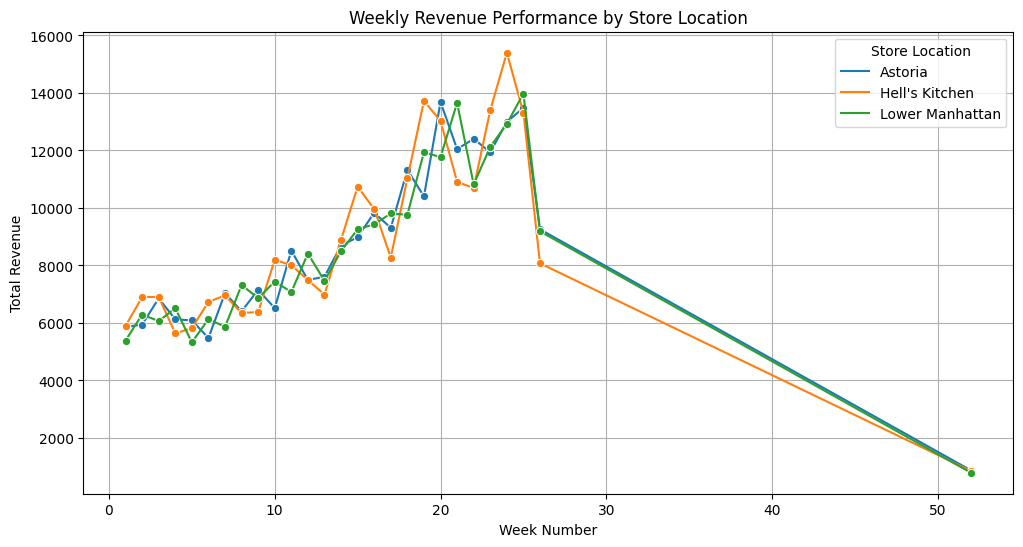

In [46]:
# Plot the weekly total revenue for each store location
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_store_performance, x='transaction_week', y='revenue', hue='store_location', marker='o')

# Customize plot
plt.title("Weekly Revenue Performance by Store Location")
plt.xlabel("Week Number")
plt.ylabel("Total Revenue")
plt.legend(title="Store Location")
plt.grid(True)
plt.show()

### Perform BCG Analysis for Product Types

Classify products into Stars, Cash Cows, Dogs, and Question Marks based on their market growth and sales share to guide strategic decision-making on product focus.

In [28]:
# Total revenue of the entire dataset
total_revenue = df['revenue'].sum()

# Group by product type to calculate total revenue and market share
product_type_sales = df.groupby('product_type').agg({
    'revenue': 'sum',
    'transaction_qty': 'sum'
}).reset_index()

# Calculate market share for each product type
product_type_sales['market_share'] = product_type_sales['revenue'] / total_revenue

# For market growth, calculate monthly growth (you could also use time periods like quarters)
monthly_type_growth = df.groupby(['transaction_month', 'product_type']).agg({
    'revenue': 'sum'
}).reset_index()

# Calculate the month-over-month growth for each product type
monthly_type_growth['market_growth'] = monthly_type_growth.groupby('product_type')['revenue'].pct_change().fillna(0)

# Merge market share and average growth for BCG matrix
bcg_matrix_type = product_type_sales.merge(
    monthly_type_growth.groupby('product_type').agg({
        'market_growth': 'mean'
    }).reset_index(),
    on='product_type'
)

# Display BCG matrix data
print("BCG Matrix Data:")
bcg_matrix_type


BCG Matrix Data:


,product_type,revenue,transaction_qty,market_share,market_growth
0,Barista Espresso,91406.20,24943,0.130802,0.139248
1,Biscotti,19793.53,5788,0.028325,0.133767
2,Black tea,2711.85,303,0.003881,0.096715
3,Brewed Black tea,47932.00,17462,0.068591,0.135645
4,Brewed Chai tea,77081.95,26250,0.110304,0.138732
5,Brewed Green tea,23852.50,8697,0.034133,0.122217
6,Brewed herbal tea,47539.50,17328,0.068029,0.137866
7,Chai tea,4301.25,443,0.006155,0.211250
8,Clothing,6163.00,221,0.008819,0.159868
9,Drinking Chocolate,2728.04,266,0.003904,0.134942


In [29]:
name_performance = df.groupby('product_name').agg({'revenue': 'sum', 'transaction_id': 'count'}).reset_index()
cat_performance = df.groupby('product_category').agg({'revenue': 'sum', 'transaction_id': 'count'}).reset_index()
type_performance = df.groupby('product_type').agg({'revenue': 'sum', 'transaction_id': 'count'}).reset_index()


In [30]:
total_revenue_name = name_performance['revenue'].sum()
total_revenue_cat = cat_performance['revenue'].sum()
total_revenue_type = type_performance['revenue'].sum()

name_performance['market_share'] = (name_performance['revenue'] / total_revenue_name) * 100
cat_performance['market_share'] = (cat_performance['revenue'] / total_revenue_cat) * 100
type_performance['market_share'] = (type_performance['revenue'] / total_revenue_type) * 100


In [31]:
df['transaction_month'] = df['transaction_date'].dt.to_period('M')
name_monthly_revenue = df.groupby(['transaction_month', 'product_name'])['revenue'].sum().reset_index()
cat_monthly_revenue = df.groupby(['transaction_month', 'product_category'])['revenue'].sum().reset_index()
type_monthly_revenue = df.groupby(['transaction_month', 'product_type'])['revenue'].sum().reset_index()

In [32]:
name_revenue_growth = name_monthly_revenue.groupby('product_name')['revenue'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100).reset_index()
cat_revenue_growth = cat_monthly_revenue.groupby('product_category')['revenue'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100).reset_index()
type_revenue_growth = type_monthly_revenue.groupby('product_type')['revenue'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100).reset_index()

name_revenue_growth.columns = ['product_name', 'growth_rate']
cat_revenue_growth.columns = ['product_category', 'growth_rate']
type_revenue_growth.columns = ['product_type', 'growth_rate']


In [33]:
name_bcg_data = pd.merge(name_performance, name_revenue_growth, on='product_name')
name_bcg_data

,product_name,revenue,transaction_id,market_share,growth_rate
0,Almond Croissant,7168.13,1903,1.025759,110.301235
1,Brazilian,37746.50,8489,5.401522,90.384240
2,Brazilian - Organic,3852.00,209,0.551221,170.000000
3,Cappuccino,33639.25,5565,4.813775,117.271615
4,Carmel,2060.80,1725,0.294900,87.925697
5,Chili Mayan,1972.84,148,0.282313,77.777778
6,Chocolate,2126.40,1733,0.304288,91.640867
7,Chocolate Chip Biscotti,6748.96,1891,0.965776,115.693935
8,Chocolate Croissant,11625.98,3076,1.663677,104.187927
9,Civet Cat,11700.00,190,1.674269,108.108108


In [34]:
# Calculate thresholds for market share and growth rate
name_market_share_threshold = name_bcg_data['market_share'].median()
name_growth_rate_threshold = name_bcg_data['growth_rate'].median()

# Classify products by market share (Low/High) and growth rate (Low Growth/High Growth)
name_bcg_data['market_share_class'] = pd.cut(
    name_bcg_data['market_share'],
    bins=[-float('inf'), name_market_share_threshold, float('inf')],
    labels=['Low', 'High']
)

name_bcg_data['growth_rate_class'] = pd.cut(
    name_bcg_data['growth_rate'],
    bins=[-float('inf'), name_growth_rate_threshold, float('inf')],
    labels=['Low Growth', 'High Growth']
)

# Combine classifications into a single category
name_bcg_data['BCG_category'] = name_bcg_data['market_share_class'].astype(str) + name_bcg_data['growth_rate_class'].astype(str)

# Mapping combined categories to BCG Matrix types
name_bcg_data['BCG_category'] = name_bcg_data['BCG_category'].map({
    'LowLow Growth': 'Dogs',
    'LowHigh Growth': 'Question Marks',
    'HighLow Growth': 'Cash Cows',
    'HighHigh Growth': 'Stars'
})

# Display the results
name_bcg_data[['product_name', 'market_share', 'growth_rate', 'BCG_category']]

,product_name,market_share,growth_rate,BCG_category
0,Almond Croissant,1.025759,110.301235,Question Marks
1,Brazilian,5.401522,90.384240,Cash Cows
2,Brazilian - Organic,0.551221,170.000000,Question Marks
3,Cappuccino,4.813775,117.271615,Stars
4,Carmel,0.294900,87.925697,Dogs
5,Chili Mayan,0.282313,77.777778,Dogs
6,Chocolate,0.304288,91.640867,Dogs
7,Chocolate Chip Biscotti,0.965776,115.693935,Question Marks
8,Chocolate Croissant,1.663677,104.187927,Stars
9,Civet Cat,1.674269,108.108108,Stars


In [36]:
cat_bcg_data = pd.merge(cat_performance, cat_revenue_growth, on='product_category')
cat_bcg_data

,product_category,revenue,transaction_id,market_share,growth_rate
0,Bakery,82315.64,22796,11.779363,101.885221
1,Branded,13607.00,747,1.947161,80.582011
2,Coffee,269952.45,58416,38.630178,107.279364
3,Coffee beans,40085.25,1753,5.736197,88.983366
4,Drinking Chocolate,72416.00,11468,10.362725,105.163263
5,Flavours,8408.80,6790,1.203299,106.075534
6,Loose Tea,11213.60,1210,1.604665,114.139970
7,Packaged Chocolate,4407.64,487,0.630733,90.090815
8,Tea,196405.95,45449,28.105679,104.417170


In [37]:
# Calculate thresholds for market share and growth rate
cat_market_share_threshold = cat_bcg_data['market_share'].median()
cat_growth_rate_threshold = cat_bcg_data['growth_rate'].median()

# Classify products by market share (Low/High) and growth rate (Low Growth/High Growth)
cat_bcg_data['market_share_class'] = pd.cut(
    cat_bcg_data['market_share'],
    bins=[-float('inf'), cat_market_share_threshold, float('inf')],
    labels=['Low', 'High']
)

cat_bcg_data['growth_rate_class'] = pd.cut(
    cat_bcg_data['growth_rate'],
    bins=[-float('inf'), cat_growth_rate_threshold, float('inf')],
    labels=['Low Growth', 'High Growth']
)

# Combine classifications into a single category
cat_bcg_data['BCG_category'] = cat_bcg_data['market_share_class'].astype(str) + cat_bcg_data['growth_rate_class'].astype(str)

# Mapping combined categories to BCG Matrix types
cat_bcg_data['BCG_category'] = cat_bcg_data['BCG_category'].map({
    'LowLow Growth': 'Dogs',
    'LowHigh Growth': 'Question Marks',
    'HighLow Growth': 'Cash Cows',
    'HighHigh Growth': 'Stars'
})

# Display the results
cat_bcg_data[['product_category', 'market_share', 'growth_rate', 'BCG_category']]

,product_category,market_share,growth_rate,BCG_category
0,Bakery,11.779363,101.885221,Cash Cows
1,Branded,1.947161,80.582011,Dogs
2,Coffee,38.630178,107.279364,Stars
3,Coffee beans,5.736197,88.983366,Dogs
4,Drinking Chocolate,10.362725,105.163263,Stars
5,Flavours,1.203299,106.075534,Question Marks
6,Loose Tea,1.604665,114.139970,Question Marks
7,Packaged Chocolate,0.630733,90.090815,Dogs
8,Tea,28.105679,104.417170,Cash Cows


In [38]:
type_bcg_data = pd.merge(type_performance, type_revenue_growth, on='product_type')
type_bcg_data

,product_type,revenue,transaction_id,market_share,growth_rate
0,Barista Espresso,91406.20,16403,13.080221,108.962643
1,Biscotti,19793.53,5711,2.832453,101.787090
2,Black tea,2711.85,303,0.388066,66.666667
3,Brewed Black tea,47932.00,11350,6.859066,105.049228
4,Brewed Chai tea,77081.95,17183,11.030422,107.592921
5,Brewed Green tea,23852.50,5671,3.413291,90.514999
6,Brewed herbal tea,47539.50,11245,6.802899,106.027750
7,Chai tea,4301.25,443,0.615509,208.582964
8,Clothing,6163.00,221,0.881925,54.563492
9,Drinking Chocolate,2728.04,266,0.390382,93.268927


In [39]:
# Calculate thresholds for market share and growth rate
type_market_share_threshold = type_bcg_data['market_share'].median()
type_growth_rate_threshold = type_bcg_data['growth_rate'].median()

# Classify products by market share (Low/High) and growth rate (Low Growth/High Growth)
type_bcg_data['market_share_class'] = pd.cut(
    type_bcg_data['market_share'],
    bins=[-float('inf'), type_market_share_threshold, float('inf')],
    labels=['Low', 'High']
)

type_bcg_data['growth_rate_class'] = pd.cut(
    type_bcg_data['growth_rate'],
    bins=[-float('inf'), type_growth_rate_threshold, float('inf')],
    labels=['Low Growth', 'High Growth']
)

# Combine classifications into a single category
type_bcg_data['BCG_category'] = type_bcg_data['market_share_class'].astype(str) + type_bcg_data['growth_rate_class'].astype(str)

# Mapping combined categories to BCG Matrix types
type_bcg_data['BCG_category'] = type_bcg_data['BCG_category'].map({
    'LowLow Growth': 'Dogs',
    'LowHigh Growth': 'Question Marks',
    'HighLow Growth': 'Cash Cows',
    'HighHigh Growth': 'Stars'
})

# Display the results
type_bcg_data[['product_type', 'market_share', 'growth_rate', 'BCG_category']]

,product_type,market_share,growth_rate,BCG_category
0,Barista Espresso,13.080221,108.962643,Stars
1,Biscotti,2.832453,101.787090,Cash Cows
2,Black tea,0.388066,66.666667,Dogs
3,Brewed Black tea,6.859066,105.049228,Stars
4,Brewed Chai tea,11.030422,107.592921,Stars
5,Brewed Green tea,3.413291,90.514999,Cash Cows
6,Brewed herbal tea,6.802899,106.027750,Stars
7,Chai tea,0.615509,208.582964,Question Marks
8,Clothing,0.881925,54.563492,Dogs
9,Drinking Chocolate,0.390382,93.268927,Dogs


### Identify Peak Sales Times and Days

Analyze sales patterns by day of the week and time of day to understand when stores experience the highest traffic. This can help optimize staffing and inventory levels.

### Explore the Impact of Product Size on Sales

Evaluate whether product size (e.g., small, regular, large) influences sales performance. Investigate if larger sizes drive more revenue or if customers prefer smaller sizes for certain product types.

## Insights